<a href="https://colab.research.google.com/github/awalinrizky/mandiri11/blob/main/Mandiri11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install folium contextily geopandas shapely plotly


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px


In [33]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/praktikum_ml/praktikum11/data/dataset_sosial_ekonomi_indonesia.csv"
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Provinsi,Kabupaten/Kota,Persentase_Penduduk_Miskin,IPM,Rata_Rata_Lama_Sekolah,Umur_Harapan_Hidup,PDRB,Pengeluaran_Per_Kapita,Salary,Latitude,Longitude
0,Aceh,Kabupaten Aceh Besar,5.68,69.72,13.04,65.35,286455251.0,2424895.0,4574482.0,-4.007358,123.145233
1,Aceh,Kota Banda Aceh,13.89,66.78,11.36,72.00,315710129.0,1003565.0,6426141.0,5.211429,101.416718
2,Sumatera Utara,Kabupaten Deli Serdang,3.76,80.72,9.32,68.46,124941147.0,1494497.0,6434708.0,1.711903,108.438654
3,Sumatera Utara,Kota Medan,23.01,68.92,7.44,70.59,56317135.0,1101757.0,5750423.0,-0.421464,111.852645
4,Jawa Barat,Kabupaten Bandung,8.69,67.02,9.18,74.98,95218604.0,1069681.0,2632028.0,-7.503702,115.979219


In [34]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Provinsi                    20 non-null     object 
 1   Kabupaten/Kota              20 non-null     object 
 2   Persentase_Penduduk_Miskin  20 non-null     float64
 3   IPM                         20 non-null     float64
 4   Rata_Rata_Lama_Sekolah      20 non-null     float64
 5   Umur_Harapan_Hidup          20 non-null     float64
 6   PDRB                        20 non-null     float64
 7   Pengeluaran_Per_Kapita      20 non-null     float64
 8   Salary                      20 non-null     float64
 9   Latitude                    20 non-null     float64
 10  Longitude                   20 non-null     float64
dtypes: float64(9), object(2)
memory usage: 1.8+ KB


,Persentase_Penduduk_Miskin,IPM,Rata_Rata_Lama_Sekolah,Umur_Harapan_Hidup,PDRB,Pengeluaran_Per_Kapita,Salary,Latitude,Longitude
count,20.00000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000
mean,13.78000,71.526500,10.412500,70.629500,1.834062e+08,1.418594e+06,5.023355e+06,-2.676763,115.922132
std,7.27728,7.859815,1.880308,3.352786,1.002946e+08,5.959589e+05,1.920312e+06,4.922990,13.394236
min,3.76000,60.140000,7.180000,65.350000,2.229420e+07,5.737740e+05,2.116115e+06,-9.670648,97.136719
25%,7.25000,64.607500,9.255000,67.685000,1.175105e+08,9.828642e+05,3.284364e+06,-7.071846,103.849773
50%,14.16500,69.340000,10.560000,70.760000,1.593456e+08,1.290332e+06,5.145899e+06,-3.548119,115.613117
75%,20.71000,79.287500,12.020000,73.852500,2.873277e+08,1.872312e+06,6.455084e+06,1.424847,123.977605
max,24.33000,84.670000,13.210000,75.230000,3.406881e+08,2.471301e+06,8.557110e+06,5.518558,139.419074


In [35]:
print(df.isna().sum())
print("Jumlah duplikasi:", df.duplicated().sum())


Provinsi                      0
Kabupaten/Kota                0
Persentase_Penduduk_Miskin    0
IPM                           0
Rata_Rata_Lama_Sekolah        0
Umur_Harapan_Hidup            0
PDRB                          0
Pengeluaran_Per_Kapita        0
Salary                        0
Latitude                      0
Longitude                     0
dtype: int64
Jumlah duplikasi: 0


In [36]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[-2, 118], zoom_start=5)

heat_data = df[['Latitude','Longitude','Persentase_Penduduk_Miskin']].values.tolist()
HeatMap(heat_data).add_to(m)

m

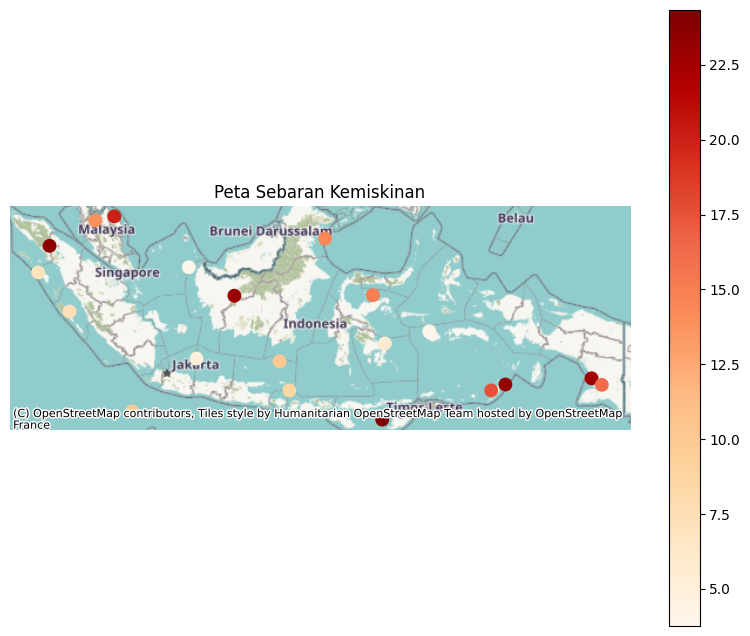

In [37]:
!pip install contextily
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    column="Persentase_Penduduk_Miskin",
    cmap="OrRd",
    markersize=80,
    legend=True,
    ax=ax
)
ctx.add_basemap(ax)
ax.set_axis_off()
plt.title("Peta Sebaran Kemiskinan")
plt.show()

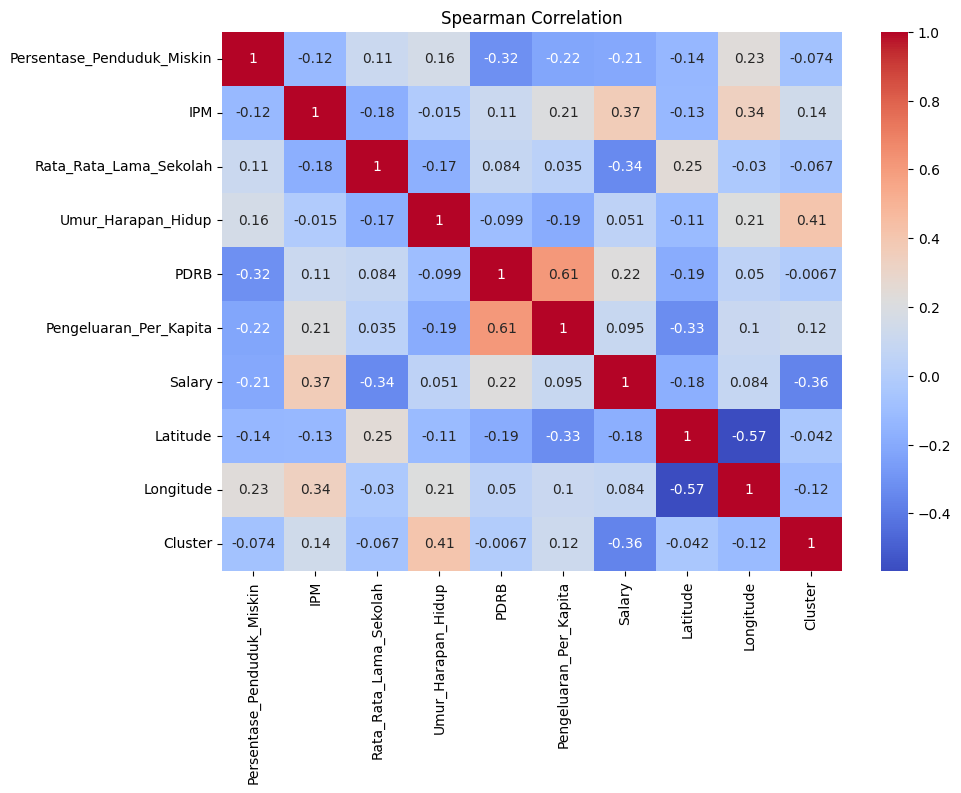

In [45]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr(method='spearman')

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation")
plt.show()

In [39]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(numeric_df)
df_scaled = pd.DataFrame(scaled, columns=numeric_df.columns)
df_scaled.head()

,Persentase_Penduduk_Miskin,IPM,Rata_Rata_Lama_Sekolah,Umur_Harapan_Hidup,PDRB,Pengeluaran_Per_Kapita,Salary,Latitude,Longitude
0,-0.630386,0.025886,0.896926,-0.877179,0.748509,1.275583,-0.180217,-0.054049,0.374214
1,-0.020431,-0.174387,0.289331,0.201054,0.920782,-0.322410,0.403770,1.030936,-0.705312
2,-0.773031,0.775204,-0.448463,-0.372923,-0.202597,0.229542,0.406472,0.619067,-0.356445
3,0.657132,-0.028610,-1.128391,-0.027564,-0.606702,-0.212013,0.190658,0.367985,-0.186829
4,-0.406761,-0.158038,-0.499096,0.684232,-0.377624,-0.248076,-0.792839,-0.465544,0.018189


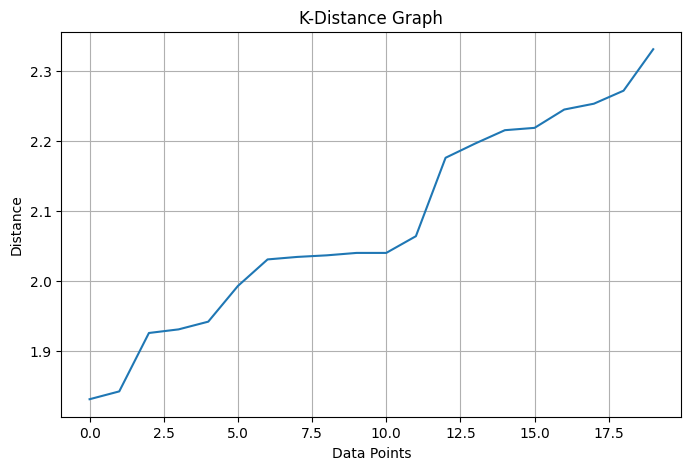

In [44]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances[:, 4])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid()
plt.show()

In [43]:
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

df["Cluster"] = labels
df.head()

,Provinsi,Kabupaten/Kota,Persentase_Penduduk_Miskin,IPM,Rata_Rata_Lama_Sekolah,Umur_Harapan_Hidup,PDRB,Pengeluaran_Per_Kapita,Salary,Latitude,Longitude,Cluster
0,Aceh,Kabupaten Aceh Besar,5.68,69.72,13.04,65.35,286455251.0,2424895.0,4574482.0,-4.007358,123.145233,0
1,Aceh,Kota Banda Aceh,13.89,66.78,11.36,72.00,315710129.0,1003565.0,6426141.0,5.211429,101.416718,0
2,Sumatera Utara,Kabupaten Deli Serdang,3.76,80.72,9.32,68.46,124941147.0,1494497.0,6434708.0,1.711903,108.438654,0
3,Sumatera Utara,Kota Medan,23.01,68.92,7.44,70.59,56317135.0,1101757.0,5750423.0,-0.421464,111.852645,0
4,Jawa Barat,Kabupaten Bandung,8.69,67.02,9.18,74.98,95218604.0,1069681.0,2632028.0,-7.503702,115.979219,1


In [42]:
valid_mask = labels != -1  # kecuali noise
score = silhouette_score(df_scaled[valid_mask], labels[valid_mask])
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.173


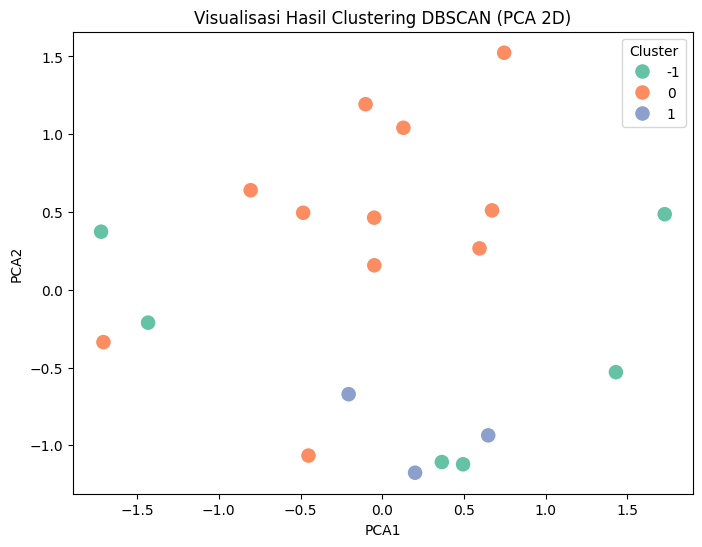

In [46]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df["PCA1"] = pca_data[:, 0]
df["PCA2"] = pca_data[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="PCA1", y="PCA2",
    hue="Cluster",
    palette="Set2",
    s=130
)
plt.title("Visualisasi Hasil Clustering DBSCAN (PCA 2D)")
plt.show()


In [47]:
fig = px.scatter(
    df,
    x="PCA1",
    y="PCA2",
    color=df["Cluster"].astype(str),
    hover_name="Kabupaten/Kota",
    title="Plotly Interactive Cluster Viewer"
)

fig.show()


In [48]:
summary = df.groupby("Cluster").mean(numeric_only=True)
summary


,Persentase_Penduduk_Miskin,IPM,Rata_Rata_Lama_Sekolah,Umur_Harapan_Hidup,PDRB,Pengeluaran_Per_Kapita,Salary,Latitude,Longitude,PCA1,PCA2
Cluster,,,,,,,,,,,
-1,16.190000,71.056667,10.316667,69.501667,1.509065e+08,1.319827e+06,5.677488e+06,-3.703003,124.175688,0.143830,-0.351548
0,11.254545,70.777273,10.525455,70.192727,2.190361e+08,1.538202e+06,5.178555e+06,-0.922313,107.870390,-0.136907,0.444699
1,18.220000,75.213333,10.190000,74.486667,1.177629e+08,1.177566e+06,3.146021e+06,-7.057268,128.938077,0.214332,-0.927466
